In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('dataset.txt', sep = ';')
df.head()

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Features: 

ind ----> a simple index

sbp ----> blood pressure

tobacco ----> cumulative tobacco (kg)

idl ----> low density lipoprotein cholestero

adiposity ----> adiposity 

famhist ----> family history

typea ----> behavior type A

obesity ----> obesity

alcohol ----> current consumption of alcohol

age ----> age at time of heart attack

chd ----> coronary disease (1 = yes, 0 = no)

In [3]:
df.describe()

,ind,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,231.935065,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,133.938585,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,1.000000,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,116.250000,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,231.500000,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,347.750000,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,463.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [4]:
df.isnull().sum()

ind          0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [5]:
df['chd'].value_counts()

0    302
1    160
Name: chd, dtype: int64

Percent of people have no disease: 65.37%
Percent of people have disease: 34.63%


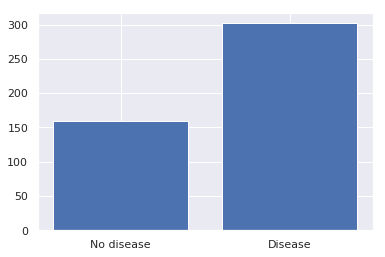

In [6]:
#sns.countplot(x = 'chd', data = df)
#len(df[df.chd ==1])
#len(df[df.chd ==0])

disease = df[df['chd']==0]['chd'].count()
no_disease = df[df['chd']==1]['chd'].count()

print('Percent of people have no disease: {:.2f}%'.format((disease/df['chd'].count()*100)))
print('Percent of people have disease: {:.2f}%'.format((no_disease/df['chd'].count()*100)))

x = ['No disease', 'Disease']
y = np.array([no_disease, disease])

plt.bar(x, y)
plt.show()

In [7]:
df.groupby('chd').mean()

,ind,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
chd,,,,,,,,,
0,238.149007,135.460265,2.634735,4.344238,23.969106,52.36755,25.737450,15.931358,38.854305
1,220.206250,143.737500,5.524875,5.487938,28.120250,54.49375,26.622937,19.145250,50.293750


Find the relation between age and disease

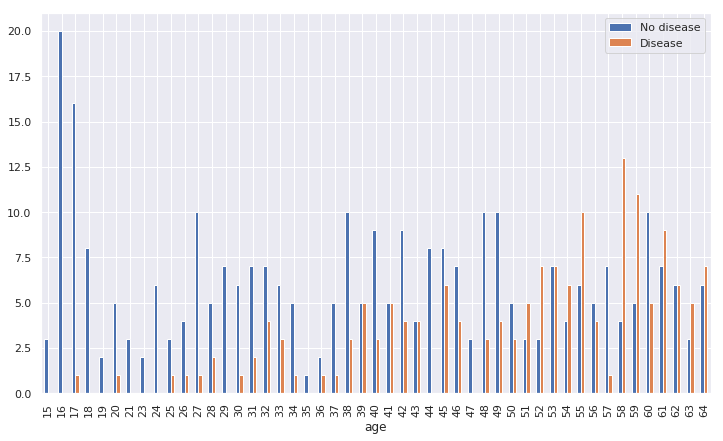

In [8]:

pd.crosstab(df.age, df.chd).plot(kind = 'bar', figsize = (12, 7))
plt.legend(['No disease', 'Disease'])

Seems like the older people tend to have the disease

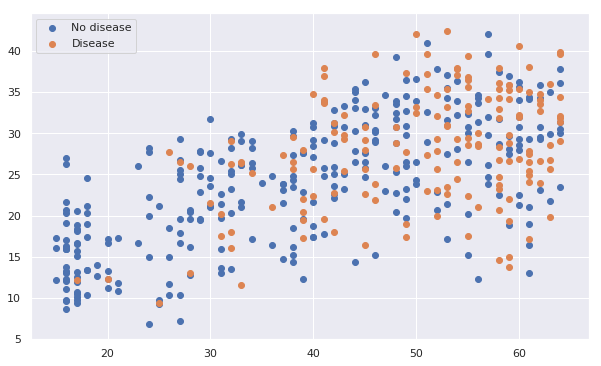

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.chd ==0], df.adiposity[df.chd ==0])
plt.scatter(df.age[df.chd ==1], df.adiposity[df.chd ==1])
plt.legend(['No disease', 'Disease'])

In [10]:
from sklearn.preprocessing import LabelEncoder
df['famhist'] = df['famhist'].map({'Present': 1, 'Absent': 0})
df.head()

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


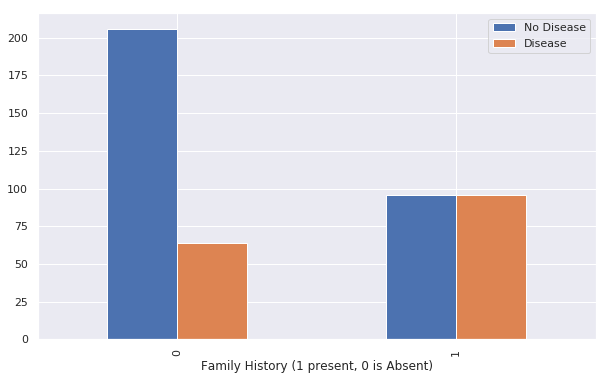

In [11]:
pd.crosstab(df.famhist, df.chd).plot(kind = 'bar', figsize = (10, 6))
plt.xlabel('Family History (1 present, 0 is Absent)')
plt.legend(['No Disease', 'Disease'])

Patients with members in their family having this disease would be more more susceptible to this disease

In [12]:
X = df.drop(['chd', 'ind'], axis = 1)
y = df['chd'].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


print('Accuracy: {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))
# is the same as logreg.score(X_test, y_test)

Accuracy: 79.57%


In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print('Accuracy: {:.2f}%'.format(metrics.accuracy_score(y_test, clf_pred)*100))

Accuracy: 75.27%


In [17]:
from sklearn import svm
sv = svm.SVC(kernel = 'linear')
sv.fit(X_train, y_train)
sv_pred = sv.predict(X_test)
print('Accuracy: {:.2f}%'.format(metrics.accuracy_score(y_test, sv_pred)*100))

Accuracy: 76.34%


In [18]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print('Accuracy: {:.2f}%'.format(metrics.accuracy_score(y_test,dtc_pred)*100))

Accuracy: 74.19%


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 8)
knc.fit(X_train, y_train)
knc_pred = knc.predict(X_test)
print('Accuracy: {:.2f}%'.format(metrics.accuracy_score(y_test, knc_pred)*100))

Accuracy: 62.37%


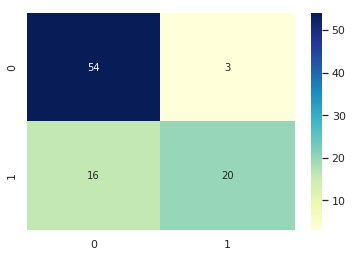

In [28]:
from sklearn import metrics
cf = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cf), annot=True, cmap="YlGnBu" ,fmt='g')